# source: https://www.youtube.com/watch?v=BzcBsTou0C0 

Lecture 1


In [1]:
# pytorch is numpy on a gpu with some nice helper funtions
import torch

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
x*y

tensor([10.,  3.])

In [3]:
x = torch.zeros([2,3,]) # rows, columns
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
y = torch.rand([5,5])

In [5]:
# this is how you flatten things
y.view([1,25]) # does not transform in place you would need to reassign


tensor([[0.7188, 0.0875, 0.5934, 0.0457, 0.1012, 0.1266, 0.1482, 0.5630, 0.4907,
         0.9637, 0.9691, 0.4173, 0.9587, 0.6751, 0.2707, 0.8751, 0.4063, 0.3243,
         0.1056, 0.9458, 0.0360, 0.7773, 0.7259, 0.7688, 0.3765]])

# Lecture 2 https://www.youtube.com/watch?v=i2yPxY2rOzs

The data

In [6]:
import torchvision # just has a bunch of vision dataset
import torch
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))
                  

# the transfrom parameter is a list of functions that will be the transformations of data


In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True) # batch says feed 10 items into the model at a time typically between 8 and 64
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True) # just trial and error. You always want to shuffle. 

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x,y = data[0][0], data[1][0]
print(y)

tensor(1)


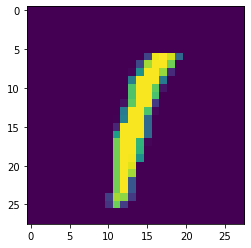

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x.view([28,28]))

###  https://www.youtube.com/watch?v=ixathu7U-LQ

In [12]:
# building the model

import torch.nn as nn
import torch.nn.functional as F
# these two libraries are mostly interchangeable

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self. fully connected layer 1 = nn.Linear(input flat tensor (1d array size is 728))
        self.fc1 = nn.Linear(28*28, 64) # format is input size, output size. You can choose output size
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # there are 10 classes so this is the end size. 

    # this is a normal basic feed forward network

    def forward(self, x):
        """
            Define how data,x, passes through the network
        """
        # x is the data that you are passign though the network

        x = F.relu(self.fc1(x)) # pass the data x through the first Fully connected node. Then pass easch element through the ReLu activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # we want a function that constrains such as argmax
        return F.log_softmax(x, dim=1) # converts x into a prob distribution of catgories 
net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
X = torch.rand([28,28])
#X = X.view([28*28]) # these things are very finicky about how they want you to fomrat things
X = X.view(-1,28*28)
X.shape

torch.Size([1, 784])

In [14]:
output = net(X) # this throws an error because X is not flattened

output # you have successfully passed an image through a NN you built

tensor([[-2.4246, -2.4057, -2.3352, -2.3110, -2.3440, -2.3057, -2.1970, -2.2579,
         -2.1524, -2.3249]], grad_fn=<LogSoftmaxBackward>)

## Part 4

https://www.youtube.com/watch?v=9j-_dOze4IM


In [17]:
# loss is a measure of how wrong the model is
# the optimizer is the thing that changes the weights

import torch.optim as optim
                                        # you also choose the learning rate

optimizer  = optim.Adam(net.parameters(),lr=.001)# first param is everything that is adjustable in the model. You can change it so that they can only change a subset of the layers. 
# this is useful for when you already have a pretrained model that you want to adapt to your own purposes. 

# an epoch is a full pass through the data

EPOCHS =3

for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0356, grad_fn=<NllLossBackward>)
tensor(0.0147, grad_fn=<NllLossBackward>)
tensor(0.2167, grad_fn=<NllLossBackward>)


In [20]:
total =0 
correct = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

round(correct / total ,2)

0.96